# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [6]:
import pandas as pd

df = pd.read_csv('Churn_df_copy.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotaltoMonthlyCharges
customerID,,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0,1.000000
5575-GNVDE,34,1,1,1,56.95,1889.50,0,33.178227
3668-QPYBK,2,1,0,1,53.85,108.15,1,2.008357
7795-CFOCW,45,0,1,2,42.30,1840.75,0,43.516548
9237-HQITU,2,1,0,0,70.70,151.65,1,2.144979
...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0,23.472877
2234-XADUH,72,1,1,3,103.20,7362.90,0,71.345930
4801-JZAZL,11,0,0,0,29.60,346.45,0,11.704392


In [7]:
df2 = df.drop('TotaltoMonthlyCharges', axis='columns', inplace = True)
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,1,56.95,1889.50,0
3668-QPYBK,2,1,0,1,53.85,108.15,1
7795-CFOCW,45,0,1,2,42.30,1840.75,0
9237-HQITU,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0
2234-XADUH,72,1,1,3,103.20,7362.90,0
4801-JZAZL,11,0,0,0,29.60,346.45,0


Here I am importing pandas, importing the data, previewing at the data, and dropping TotaltoMontlyCharges.  I tried keeping TotaltoMonthlyCharges but the model had issues later on because the new Churn data does not contain that column.  

At this point I created a virtual python environment for python 3.10 using the steps in the FTE.  

In [5]:
#!jupyter kernelspec list

Available kernels:
  python310env    C:\Users\ReedJ\AppData\Roaming\jupyter\kernels\python310env
  python3         C:\Users\ReedJ\anaconda3\share\jupyter\kernels\python3


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Here you can see my newly created virtual environment python310env.  This was done through the command prompt.  I use this kernel for the remainder of the notebook.  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   PhoneService    7032 non-null   int64  
 2   Contract        7032 non-null   int64  
 3   PaymentMethod   7032 non-null   int64  
 4   MonthlyCharges  7032 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7032 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 439.5+ KB


Here I am checking the data types.  

In [9]:
df['Churn'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

Here I am calculating the "no information rate." It is 0.73.  

In [8]:
#pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lightgbm>=3.0.0 from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     - -------------------------------------- 0.2/7.2 MB 3.9 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/7.2 MB 7.2 MB/s eta 0:00:01
     -------- ------------------------------- 1.5/7.2 MB 10.5 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
ydata-profiling 0.0.dev0 requires wordcloud>=1.9.1, but you have wordcloud 0.0.0 which is incompatible.


Above you can see my installation of pycaret.  This was also done in command prompt. However, I had to do it in the notebook as well for the model to work correctly.  

In [10]:
from pycaret.classification import ClassificationExperiment

Here I am importing ClassificationExperiment from pycaret.  

In [11]:
automl = ClassificationExperiment()

Here I set up the varibale automl and tie it to the ClassificationExperimant model.  

In [12]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,2079
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 7)"
4,Transformed data shape,"(7032, 7)"
5,Transformed train set shape,"(4922, 7)"
6,Transformed test set shape,"(2110, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


Here are the setup parameters for the ClassificationExperiment model.  I am leaving everything as the default.  

In [13]:
automl

Here I run the ClassificationExperiment model on the data.  

In [14]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7915,0.8339,0.5030,0.6386,0.5616,0.4275,0.4335,0.4840
gbc,Gradient Boosting Classifier,0.7907,0.8369,0.4862,0.6433,0.5523,0.4194,0.4273,0.0800
lda,Linear Discriminant Analysis,0.7893,0.8207,0.4908,0.6373,0.5531,0.4184,0.4255,0.0080
ridge,Ridge Classifier,0.7869,0.0000,0.4266,0.6542,0.5154,0.3865,0.4016,0.0070
ada,Ada Boost Classifier,0.7869,0.8343,0.4946,0.6272,0.5518,0.4148,0.4206,0.0370
lightgbm,Light Gradient Boosting Machine,0.7832,0.8250,0.5069,0.6132,0.5538,0.4125,0.4165,0.0870
rf,Random Forest Classifier,0.7664,0.8006,0.4809,0.5719,0.5213,0.3687,0.3717,0.1050
knn,K Neighbors Classifier,0.7641,0.7429,0.4305,0.5761,0.4912,0.3423,0.3492,0.2380
et,Extra Trees Classifier,0.7509,0.7793,0.4732,0.5353,0.5010,0.3363,0.3381,0.0740
qda,Quadratic Discriminant Analysis,0.7491,0.8229,0.7362,0.5203,0.6092,0.4326,0.4472,0.0080


In [15]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2079, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Above I am comparing models to determine the best fit for preicting Churn.  Gradient Boosting Classifier has the highest AUC while Logistic Regression has the highest accuracy. Native Bayes also has a relatively high recall. All of the other models score below the no information rate of 0.73.  

I did some research about accuracy and AUC and learned that accuracy is better for balanced datasets while AUC is better for unbalanced datasets (Chugh, 2022).  As this dataset is fairly balanced, accuracy is the better score to use.  Logistic Regression is the best model.  

Reference:  Chugh, V., 2022, Which Metric Should I Use? Accuracy vs. AUC, KD Nuggets, https://www.kdnuggets.com/2022/10/metric-accuracy-auc.html

In [16]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

These are the suggested plots for model evaluation based on the best model comparison above.  

Reference:  Athala, A.R., 2023, Optimizing Machine Learning Workflows with PYCARET, Medium, https://medium.com/@atalarifqy/optimizing-machine-learning-workflows-with-pycaret-e0b19d8caf2c

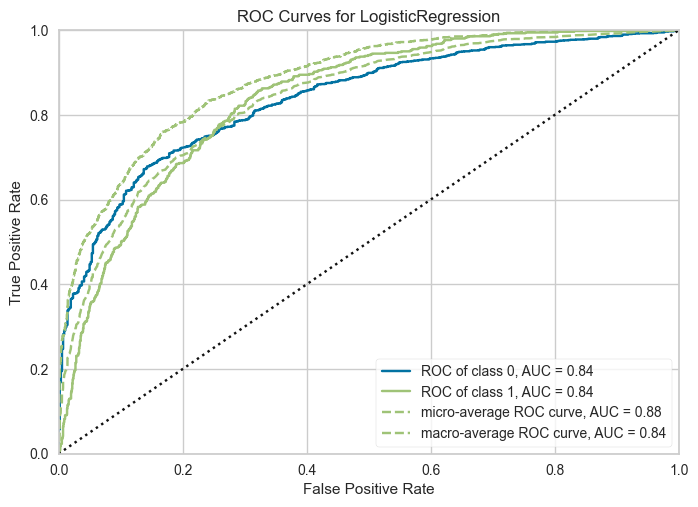

In [17]:
automl.plot_model(best_model)

Above are the Reciever Operating Characteristic curves for the model.  The shape indicates the classifier is much better than random for both 1 and 0.  

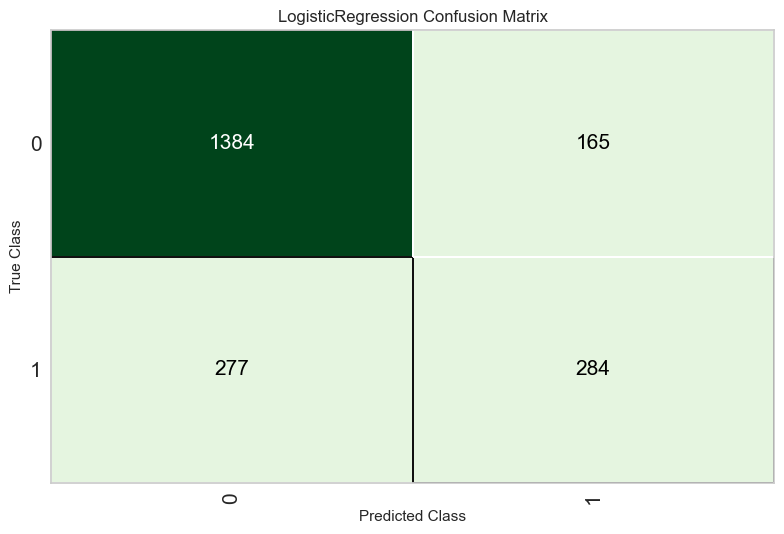

In [18]:
automl.plot_model(best_model, plot = 'confusion_matrix')

Here is a confusion matrix for the logistic regression model.  Based on this we have a TPR of 0.83.  

In [20]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,1,0,1,74.400002,306.600006,1,1,0.5626


In [21]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7905,0.8356,0.5088,0.6315,0.5636,0.4278,0.4322


In [22]:
predictions.sample(20)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8080-POTJR,30,1,1,3,79.300003,2427.100098,0,0,0.8813
5054-IEXZT,1,1,0,0,75.349998,75.349998,1,1,0.6443
5447-VYTKW,27,1,0,1,53.450001,1461.449951,0,0,0.7672
1686-STUHN,42,1,1,2,19.799999,849.900024,0,0,0.9869
1862-QRWPE,48,1,2,2,20.650000,1057.000000,0,0,0.9966
9603-OAIHC,1,1,0,0,70.050003,70.050003,0,1,0.6160
4990-ALDGW,57,1,2,1,20.750000,1118.800049,0,0,0.9974
4110-PFEUZ,1,1,0,1,69.550003,69.550003,1,1,0.5601
0867-LDTTC,5,1,0,2,75.150002,392.649994,0,1,0.5046


Above I am looking at the predictions vs actuals in a data sample.   

In [23]:
automl.save_model(best_model, 'pycaret_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('...
                                        

Here I saved the model to disc.  

In [24]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_churn_model')

Transformation Pipeline and Model Successfully Loaded


Above I test-load the model.  

In [25]:
new_pycaret.predict_model(loaded_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,1,0,1,74.400002,306.600006,1,1,0.5626


In [26]:
new_data = pd.read_csv('new_churn_data.csv')
new_data

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
0,9305-CKSKC,22,1,0,2,97.40,811.70,36.895455
1,1452-KNGVK,8,0,1,1,77.30,1701.95,212.743750
2,6723-OKKJM,28,1,0,0,28.25,250.90,8.960714
3,7832-POPKP,62,1,0,2,101.70,3106.56,50.105806
4,6348-TACGU,10,0,0,1,51.15,3440.97,344.097000


Above I'm importing the new test data.  

In [27]:
from pycaret.classification import predict_model

Here I'm importing predict_model from pycaret.  

In [28]:
predictions2 = predict_model(loaded_model, data = new_data)
predictions2.rename({'prediction_label': 'Churn_pred'}, axis=1, inplace=True)
predictions2['Churn_pred'].replace({1: 'Churn', 0: 'No Churn'}, inplace=True)

print('Predictions:')
print(predictions2)

Predictions:
   customerID  tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
0  9305-CKSKC      22             1         0              2       97.400002   
1  1452-KNGVK       8             0         1              1       77.300003   
2  6723-OKKJM      28             1         0              0       28.250000   
3  7832-POPKP      62             1         0              2      101.699997   
4  6348-TACGU      10             0         0              1       51.150002   

   TotalCharges  charge_per_tenure Churn_pred  prediction_score  
0    811.700012          36.895454   No Churn            0.5824  
1   1701.949951         212.743744      Churn            0.5195  
2    250.899994           8.960714   No Churn            0.8787  
3   3106.560059          50.105808   No Churn            0.8622  
4   3440.969971         344.096985      Churn            0.7318  


Above I ran the pycaret churn model on the new test data. I renamed the "prediction label" column to "Churn_pred."  I also replaced the 0's and 1's with "Churn" and "No Churn."

In this assignment I used pycaret and automl to run analyses for the best classification model for the Churn dataset.  The best model chosen by the automl was the logistic regression model.  Based on the model comparison and scoring methods I agree.  I saved this model to disk and ran it on the new test dataset new_churn_data.csv.  The results above indicate that two of the new datapoints will likely churn and three will not.  However, two datapoints have a low prediction score indicating some uncertainty within the model.  

Reed Johnson 2/20/24

# Summary

Write a short summary of the process and results here.